In [1]:
from openai import OpenAI
from tqdm import tqdm

import json
import time
import os
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

## Data Saving
If already done, jump to data loading part.

In [ ]:
data_2010_path = "./data/data_2010.parquet"
data_2011_path = "./data/data_2011.parquet"
data_2012_path = "./data/data_2012.parquet"
data_2013_path = "./data/data_2013.parquet"
data_2014_path = "./data/data_2014.parquet"
data_2015_path = "./data/data_2015.parquet"
data_2016_path = "./data/data_2016.parquet"
data_2017_path = "./data/data_2017.parquet"
data_2018_path = "./data/data_2018.parquet"
data_2019_path = "./data/data_2019.parquet"

df2010 = pd.read_parquet(data_2010_path)
df2011 = pd.read_parquet(data_2011_path)
df2012 = pd.read_parquet(data_2012_path)
df2013 = pd.read_parquet(data_2013_path)
df2014 = pd.read_parquet(data_2014_path)
df2015 = pd.read_parquet(data_2015_path)
df2016 = pd.read_parquet(data_2016_path)
df2017 = pd.read_parquet(data_2017_path)
df2018 = pd.read_parquet(data_2018_path)
df2019 = pd.read_parquet(data_2019_path)

df = pd.concat([df2010, df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018,df2019], ignore_index = True)

In [ ]:
df.info()

In [4]:
df_banks = df[df["type"] == "Banks"]
df_banks.to_csv("./data/banks.csv", index=False, encoding="utf-8-sig")

KeyboardInterrupt: 

In [5]:
cols = ['permno', 'fdate', 'type', 'me', 'be', 'profit', 'Gat', 'beta', 'holding','mgrno','mgrid']
sub_df = df[cols].copy()
os.makedirs("json_data", exist_ok=True)

for inv_type, group in sub_df.groupby("type"):
    
    filename = inv_type.replace(" ", "_").lower() + ".json"
    filepath = os.path.join("json_data", filename)
    
    
    group.to_json(filepath, orient="records", lines=False, force_ascii=False, indent=2)
    print(f"✅ Save {inv_type} to {filepath}")

/tmp/ipykernel_998/3890439883.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for inv_type, group in sub_df.groupby("type"):


✅ Save Households to json_data/households.json
✅ Save Banks to json_data/banks.json
✅ Save Insurance companies to json_data/insurance_companies.json
✅ Save Investment advisors to json_data/investment_advisors.json
✅ Save Mutual funds to json_data/mutual_funds.json
✅ Save Pension funds to json_data/pension_funds.json
✅ Save Other to json_data/other.json


## Data Loading

In [ ]:
filepath = os.path.join("json_data", "banks.json")
df_banks = pd.read_json(filepath, orient="records")
df_banks["fdate"] = pd.to_datetime(df_banks["fdate"], unit="ms")

In [ ]:
df_banks.head(5)

In [8]:

print("Unique mgrno count:", df_banks["mgrno"].nunique())
print("Unique mgrid count:", df_banks["mgrid"].nunique())


print("\nHead mgrno:")
print(df_banks["mgrno"].dropna().unique()[:10])

print("\nHead mgrid:")
print(df_banks["mgrid"].dropna().unique()[:10])


print("\nTop 10 mgrno:")
print(df_banks["mgrno"].value_counts().head(10))

print("\nTop 10 mgrid:")
print(df_banks["mgrid"].value_counts().head(10))


Unique mgrno count: 234
Unique mgrid count: 4

Head mgrno:
[1373 1500 2740 3880 4718 4730 5930 5960 5970 6027]

Head mgrid:
[0 1 2 3]

Top 10 mgrno:
mgrno
7800     90572
62890    88771
65260    86688
55390    83266
65850    81209
81540    79997
58835    74986
37700    74603
29285    73393
43510    67989
Name: count, dtype: int64

Top 10 mgrid:
mgrid
0    2786965
1     161899
2      50172
3       7312
Name: count, dtype: int64


chosen permno: 16600


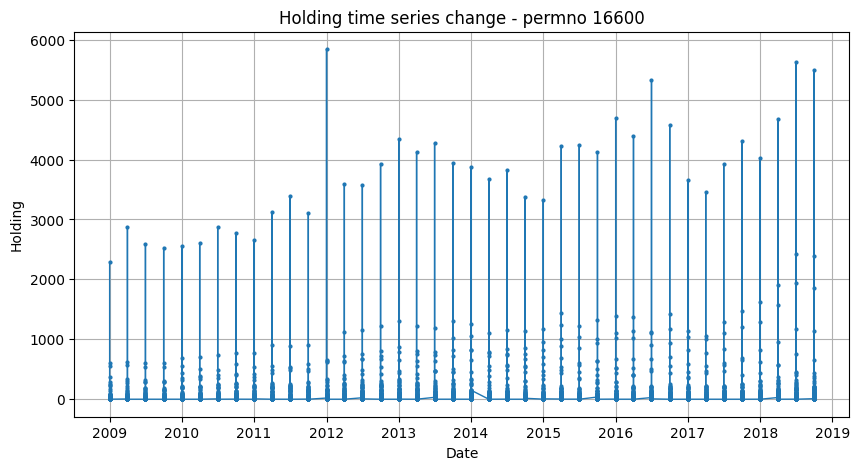

In [9]:

permno_sample = df["permno"].sample(1, random_state=42).iloc[0]
print("chosen permno:", permno_sample)

stock_df = df[df["permno"] == permno_sample].copy()

stock_df = stock_df.sort_values("fdate")


plt.figure(figsize=(10,5))
plt.plot(stock_df["fdate"], stock_df["holding"], marker="o", markersize=2, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Holding")
plt.title(f"Holding time series change - permno {permno_sample}")
plt.grid(True)
plt.show()

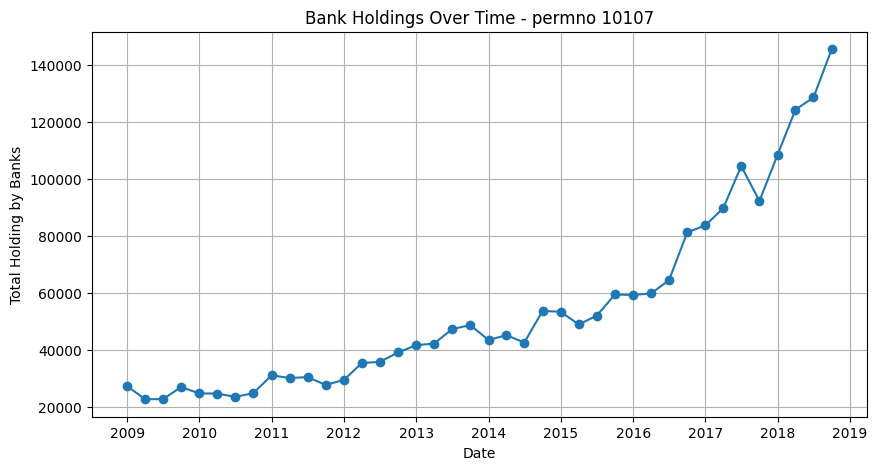

In [10]:
agg_banks = df_banks.groupby(["permno", "fdate"])["holding"].sum().reset_index()

permno_sample = 10107
stock_df = agg_banks[agg_banks["permno"] == permno_sample].sort_values("fdate")

plt.figure(figsize=(10,5))
plt.plot(stock_df["fdate"], stock_df["holding"], marker="o")
plt.xlabel("Date")
plt.ylabel("Total Holding by Banks")
plt.title(f"Bank Holdings Over Time - permno {permno_sample}")
plt.grid(True)
plt.show()

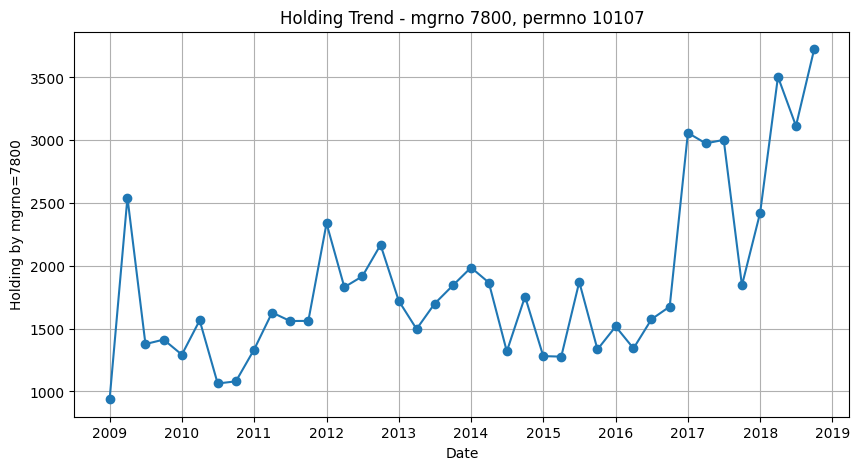

             fdate      holding
3743    2010-01-01   938.151270
79426   2010-04-01  2543.581754
151548  2010-07-01  1377.187741
223598  2010-10-01  1412.812370
295976  2011-01-01  1292.896955
373666  2011-04-01  1565.984316
449796  2011-07-01  1063.475203
523714  2011-10-01  1080.473931
599229  2012-01-01  1333.434646
674331  2012-04-01  1628.448441
749027  2012-07-01  1560.753570
823407  2012-10-01  1561.906871
897362  2013-01-01  2338.047830
967763  2013-04-01  1830.282991
1041307 2013-07-01  1916.726819
1114908 2013-10-01  2167.040270
1186438 2014-01-01  1721.201569
1257380 2014-04-01  1496.966685
1329517 2014-07-01  1698.513456
1402808 2014-10-01  1843.676058
1476612 2015-01-01  1986.568178
1550587 2015-04-01  1866.942373
1624332 2015-07-01  1318.614716
1699951 2015-10-01  1756.000794
1776636 2016-01-01  1281.430543
1853161 2016-04-01  1277.237694
1929709 2016-07-01  1872.098446
2004863 2016-10-01  1334.775017
2081774 2017-01-01  1517.339992
2157429 2017-04-01  1342.761162
2232540 

In [12]:
mgrno_sample = 7800
permno_sample = 10107


sub = df_banks[(df_banks["mgrno"] == mgrno_sample) & 
               (df_banks["permno"] == permno_sample)].copy()


sub = sub.sort_values("fdate")


plt.figure(figsize=(10,5))
plt.plot(sub["fdate"], sub["holding"], marker="o")
plt.xlabel("Date")
plt.ylabel("Holding by mgrno=7800")
plt.title(f"Holding Trend - mgrno {mgrno_sample}, permno {permno_sample}")
plt.grid(True)
plt.show()

print(sub[["fdate","holding"]])

In [13]:

sub = df_banks[(df_banks["mgrno"] == 7800) & (df_banks["permno"] == 10107)]


counts = sub.groupby("fdate").size().sort_values(ascending=False)

print("mgrno=7800, permno=10107 'holding at diff fdate ")
print(counts.head(20))  # 看前20个日期


mgrno=7800, permno=10107 'holding at diff fdate 
fdate
2010-01-01    1
2010-04-01    1
2010-07-01    1
2010-10-01    1
2011-01-01    1
2011-04-01    1
2011-07-01    1
2011-10-01    1
2012-01-01    1
2012-04-01    1
2012-07-01    1
2012-10-01    1
2013-01-01    1
2013-04-01    1
2013-07-01    1
2013-10-01    1
2014-01-01    1
2014-04-01    1
2014-07-01    1
2014-10-01    1
dtype: int64


# Prompt testing

## Method 1: Directly predict the holding.

In [ ]:
def get_response(prompt):
    client = OpenAI(api_key=os.getenv("DEEPSEEK_API_KEY"), base_url="https://api.deepseek.com")

    response = client.chat.completions.create(
        model="deepseek-chat",
        messages=[
            {"role": "system", "content": "You are a helpful assistant"},
            {"role": "user", "content": prompt},
        ],
        stream=False
    )
    
    return response.choices[0].message.content

In [17]:
def build_prompt(row, investor_role="bank"):

    stock_id = row["permno"]
    

    fdate = row["fdate"]
    if not isinstance(fdate, str):  
        try:
            fdate = fdate.strftime("%Y-%m-%d")
        except:
            fdate = str(fdate)

    me = row["me"]
    be = row["be"]
    profit = row["profit"]
    Gat = row["Gat"]
    beta = row["beta"]

    prompt = f"""
    Act as a quant portfolio manager representing {investor_role}. Analyze the following stock fundamentals for stock ID {stock_id} as of {fdate} and output the category's aggregate dollar portfolio holding for that stock in the next quarter.
    
    The following five characteristics are key financial metrics used in portfolio analysis:
    1. Market Equity (me): {me} million USD
    2. Book Equity (be): {be} million USD
    3. Profitability: {profit}
    4. Asset Growth Rate (Gat): {Gat}
    5. Market Beta (beta): {beta}
    
    ⸻
    
    CURRENT ANALYSIS TASK
    Stock ID: {stock_id}
    Characteristics Date: {fdate}
    
    INPUT SUMMARY:
    me = {me}, be = {be}, profit = {profit}, Gat = {Gat}, beta = {beta}
    
    ⸻
    
    Important:
    - The holding value should NOT equal the market equity.
    - It should be a derived allocation based on the above fundamentals.
    - More profitable, lower-beta firms may have higher holdings.
    - Output only one non-negative float in JSON format.
    
    OUTPUT (ONLY valid JSON):
    {{"holding_value": <value>}}
    """
    return prompt


In [19]:
predicted_holding_values = []
raw_outputs = []

for i, row in tqdm(df_banks.head(10).iterrows(),
                   total=len(df_banks.head(10)),
                   desc='gen ans'):
    prompt = build_prompt(row, investor_role="bank")
    response_text = get_response(prompt)

    
    raw_outputs.append(response_text)

    
    clean_text = re.sub(r"```json|```", "", response_text).strip()

    try:
        response_json = json.loads(clean_text)
        holding_pred = response_json.get("holding_value", None)
    except json.JSONDecodeError:
        print(f"⚠️ Row {i} JSON decode failed, raw output:")
        print(repr(response_text))
        holding_pred = None

    predicted_holding_values.append(holding_pred)



df_banks_pred = df_banks.head(10).copy()
df_banks_pred["holding_pred_m1"] = predicted_holding_values
df_banks_pred["raw_output"] = raw_outputs

print(df_banks_pred[["permno", "fdate", "holding", "holding_pred_m1", "raw_output"]])

gen ans: 100%|██████████| 10/10 [00:38<00:00,  3.90s/it]

   permno      fdate   holding  holding_pred_m1  \
0   10107 2010-01-01  1.605804    128308.539171   
1   10138 2010-01-01  0.324763      4563.354441   
2   10145 2010-01-01  0.510781     18542.730000   
3   10147 2010-01-01  0.000000     12456.420000   
4   10324 2010-01-01  0.000000      1345.720000   
5   10516 2010-01-01  0.543840     22417.000000   
6   10696 2010-01-01  0.000000     11423.570000   
7   11308 2010-01-01  0.225610     14842.360000   
8   11404 2010-01-01  0.000000     15664.217247   
9   11552 2010-01-01  0.817934     15276.420000   

                              raw_output  
0  {"holding_value": 128308.53917121885}  
1    {"holding_value": 4563.35444053712}  
2            {"holding_value": 18542.73}  
3            {"holding_value": 12456.42}  
4             {"holding_value": 1345.72}  
5             {"holding_value": 22417.0}  
6            {"holding_value": 11423.57}  
7            {"holding_value": 14842.36}  
8  {"holding_value": 15664.217246980625}  
9       

## Method 2: Take mgrno into consideration

In [14]:
def build_prompt_m2(row, investor_role="Banks", investor_id=7800):
    """Build a single prompt for one (permno, fdate) row to predict next-quarter holding for a specific investor."""
    stock_id = row["permno"]
    fdate = row["fdate"]
    if not isinstance(fdate, str):
        try:
            fdate = pd.to_datetime(fdate).strftime("%Y-%m-%d")
        except Exception:
            fdate = str(fdate)

    me = row["me"]
    be = row["be"]
    profit = row["profit"]
    Gat = row["Gat"]
    beta = row["beta"]

    prompt = f"""
Act as a quantitative portfolio manager at a {investor_role} institution.

Task: Predict the **next quarter** holding (same unit as our dataset's `holding`) for a **specific investor** in a **specific stock**.

Investor:
- investor_type: {investor_role}
- investor_id (mgrno): {investor_id}

Stock:
- stock_id (permno): {stock_id}
- as_of_date (fdate): {fdate}

Five signals (use them to derive the allocation, not as targets):
1) Market Equity (me): {me}
2) Book Equity (be): {be}
3) Profitability (profit): {profit}
4) Asset Growth Rate (Gat): {Gat}
5) Market Beta (beta): {beta}

Guidance:
- Output the **investor-specific** holding for **t+1** (next quarter), not the current quarter.
- Do NOT set holding equal to market equity; derive it from the five inputs and the investor being a bank (mgrno={investor_id}).
- Prefer higher holdings for more profitable and lower-beta firms when signals are comparable.
- Output must be a single non-negative float number. No explanation.

OUTPUT (valid JSON ONLY):
{{"holding_value": <value>}}
"""
    return prompt

In [27]:
def generate_m2_prompts(
    df_banks: pd.DataFrame,
    mgrno: int,
    permno: int,
    start_date: str = None,
    end_date: str = None,
    investor_role: str = "Banks"
):
    """
    Generate prompts for all available input dates t to predict holding at t+1
    for a specific investor (mgrno) and stock (permno).

    """
    # Ensure datetime
    df = df_banks.copy()
    if not pd.api.types.is_datetime64_any_dtype(df["fdate"]):
        # Try ms first then s if needed
        s_num = pd.to_numeric(df["fdate"], errors="coerce")
        unit = "ms" if s_num.dropna().median() > 1e11 else "s"
        df["fdate"] = pd.to_datetime(s_num, unit=unit, errors="coerce")

    # Filter to investor & stock
    df = df[(df["mgrno"] == mgrno) & (df["permno"] == permno)].copy()

    # Optional date window on input t
    if start_date is not None:
        df = df[df["fdate"] >= pd.to_datetime(start_date)]
    if end_date is not None:
        df = df[df["fdate"] <= pd.to_datetime(end_date)]

    # Sort and ensure unique per (permno, mgrno, fdate)
    df = df.sort_values("fdate")
    df = df.drop_duplicates(subset=["permno", "mgrno", "fdate"], keep="first")

    # Keep only necessary feature columns
    needed_cols = ["permno","fdate","me","be","profit","Gat","beta","mgrno"]
    missing = [c for c in needed_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    # Build rows and prompts
    results = []
    for _, row in tqdm(df.iterrows(), desc="Generating ANS", total=len(df)):
        input_date = row["fdate"]
        # compute next quarter (t + 3 months)
        target_date = input_date + pd.DateOffset(months=3)
    
        prompt = build_prompt_m2(row, investor_role=investor_role, investor_id=mgrno)
        results.append({
            "input_date": input_date,
            "target_date": target_date,
            "mgrno": mgrno,
            "permno": permno,
            "prompt": prompt
        })

    print(f"[Info] Built {len(results)} prompts for mgrno={mgrno}, permno={permno}.")
    return results


def extract_json_object(text):
    """Try to extract a JSON object from free-form text.
    Returns the json string (e.g. '{"holding_value": 12.3}') or None.
    """
    # Common case: the model returns ONLY JSON
    text = text.strip()
    if text.startswith("{") and text.endswith("}"):
        return text

    # Fallback: regex the first {...} block
    match = re.search(r"\{.*\}", text, flags=re.DOTALL)
    if match:
        return match.group(0)
    return None


def parse_model_json_to_float(json_str):
    """Parse a json string like '{"holding_value": 12.3}' into a float.
    Returns float('nan') if parsing fails.
    """
    try:
        obj = json.loads(json_str)
        val = obj.get("holding_value", None)
        return float(val) if val is not None else float("nan")
    except Exception:
        return float("nan")

def prompts_to_preds_raw(prompts, call_fn=get_response, max_retries=3, backoff=1.5, sleep_between=0.2):
    """Loop over prompts list and call the model to build preds_raw.
    Each item in `prompts` is expected to be a dict with keys:
      - "target_date": pd.Timestamp (or str)
      - "prompt": str

    Returns: list of dicts: [{"target_date": <Timestamp>, "model_json": "<json str>"}]
    """
    preds_raw = []
    for item in tqdm(prompts, desc="Querying model", total=len(prompts)):
        prompt = item["prompt"]
        target_date = item["target_date"]
        # Ensure target_date is serializable
        if not isinstance(target_date, pd.Timestamp):
            try:
                target_date = pd.to_datetime(target_date)
            except Exception:
                pass

        # simple retry loop
        last_err = None
        for attempt in range(1, max_retries + 1):
            try:
                raw_text = call_fn(prompt)
                json_str = extract_json_object(raw_text)
                if json_str is None:
                    raise ValueError("No JSON object found in model response.")
                # Keep the raw JSON string; parsing happens later in evaluation
                preds_raw.append({
                    "target_date": target_date,
                    "model_json": json_str
                })
                break
            except Exception as e:
                last_err = e
                wait = (backoff ** (attempt - 1))
                print(f"[Warn] Model call failed (attempt {attempt}/{max_retries}): {e}. Retrying in {wait:.1f}s...")
                time.sleep(wait)
        else:
            # after loop without break
            print(f"[Error] Failed to get JSON after {max_retries} attempts. Skipping this item.")
            preds_raw.append({
                "target_date": target_date,
                "model_json": json.dumps({"holding_value": None})
            })

        # small courtesy sleep for rate limits
        time.sleep(sleep_between)

    print(f"[Info] Collected {len(preds_raw)} model responses.")
    return preds_raw


def pipeline_m2(
    df_banks,
    mgrno,
    permno,
    start_date,
    end_date,
    call_fn,
    investor_role="Banks",
    plot=True
):
    """
    End-to-end for Method 2 (t -> t+1):
    1) generate_m2_prompts
    2) call model to get predictions
    3) evaluate against ground truth

    Parameters
    ----------
    df_banks : DataFrame
        Must include columns ['permno','fdate','me','be','profit','Gat','beta','mgrno','holding'].
    mgrno, permno : int
        Investor and stock IDs.
    start_date, end_date : str
        Inclusive t-window to generate prompts (e.g., "2012-04-01" .. "2013-07-01").
        Targets will be t+1 for each t in this window.
    call_fn : callable
        Function that takes a prompt string and returns raw model text (e.g., get_response).
    investor_role : str
    plot : bool

    Returns
    -------
    (eval_df, metrics, preds_raw, prompts)
    """
    print("[Stage] Generating M2 prompts...")
    prompts = generate_m2_prompts(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        start_date=start_date,
        end_date=end_date,
        investor_role=investor_role
    )

    print("[Stage] Calling model to obtain predictions (M2)...")
    preds_raw = prompts_to_preds_raw(prompts, call_fn=call_fn)

    print("[Stage] Evaluating M2 predictions against ground truth...")
    eval_df, metrics = evaluate_predictions(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        preds_raw=preds_raw,
        plot=plot
    )

    return eval_df, metrics, preds_raw, prompts

In [28]:
def parse_model_output_to_float(text):
    """
    Parse a JSON string like '{"holding_value": 123.45}' and return the float.
    Return np.nan if parsing fails.
    """
    try:
        obj = json.loads(text)
        val = obj.get("holding_value", None)
        return float(val) if val is not None else np.nan
    except Exception:
        return np.nan

def build_prediction_df(preds_raw):
    """
    Build a tidy DataFrame from raw model outputs.
    Required keys in each dict: 'target_date', 'model_json'
    """
    df_pred = pd.DataFrame(preds_raw).copy()
    # ensure datetime
    df_pred["target_date"] = pd.to_datetime(df_pred["target_date"])
    # parse JSON to float
    df_pred["y_pred"] = df_pred["model_json"].apply(parse_model_output_to_float)
    # keep only necessary
    df_pred = df_pred[["target_date", "y_pred"]]
    return df_pred

def get_ground_truth(df_banks, mgrno, permno):
    """
    Return a DataFrame with columns: ['target_date','y_true'] for the given (mgrno, permno).
    It uses df_banks['fdate'] as the 'target_date' and df_banks['holding'] as 'y_true'.
    """
    df = df_banks.copy()

    # ensure datetime for fdate
    if not pd.api.types.is_datetime64_any_dtype(df["fdate"]):
        s_num = pd.to_numeric(df["fdate"], errors="coerce")
        unit = "ms" if s_num.dropna().median() > 1e11 else "s"
        df["fdate"] = pd.to_datetime(s_num, unit=unit, errors="coerce")

    df = df[(df["mgrno"] == mgrno) & (df["permno"] == permno)].copy()
    df = df[["fdate", "holding"]].rename(columns={"fdate": "target_date", "holding": "y_true"})
    # If duplicates exist at the same target_date, aggregate (sum) or choose first
    df = df.groupby("target_date", as_index=False)["y_true"].sum()
    return df

def evaluate_predictions(df_banks, mgrno, permno, preds_raw, zero_eps=1e-9, plot=True):
    """
    Compare model predictions vs. ground truth for (mgrno, permno).

    Parameters
    ----------
    df_banks : DataFrame with at least ['fdate','holding','mgrno','permno']
    mgrno, permno : int
    preds_raw : list of dicts with keys ['target_date','model_json']
    zero_eps : small epsilon to avoid division-by-zero in MAPE
    plot : whether to plot predicted vs. actual

    Returns
    -------
    eval_df : merged DataFrame with columns ['target_date','y_true','y_pred','abs_err','pct_err']
    metrics : dict with MAE, RMSE, MAPE, count
    """
    print("[Info] Building prediction DataFrame...")
    df_pred = build_prediction_df(preds_raw)

    print("[Info] Extracting ground truth...")
    df_true = get_ground_truth(df_banks, mgrno=mgrno, permno=permno)

    print("[Info] Merging on target_date...")
    eval_df = pd.merge(df_true, df_pred, on="target_date", how="inner").sort_values("target_date")
    if eval_df.empty:
        print("[Warn] No overlapping target_date after merge. Check your dates.")
        return eval_df, {}

    # errors
    eval_df["err"] = eval_df["y_pred"] - eval_df["y_true"]
    eval_df["abs_err"] = eval_df["err"].abs()
    eval_df["pct_err"] = eval_df["abs_err"] / (eval_df["y_true"].abs() + zero_eps)

    # metrics
    mae = eval_df["abs_err"].mean()
    rmse = math.sqrt((eval_df["err"]**2).mean())
    # MAPE in %
    mape = (eval_df["pct_err"].mean()) * 100.0
    metrics = {"count": int(len(eval_df)), "MAE": mae, "RMSE": rmse, "MAPE_%": mape}

    print(f"[Result] Samples: {metrics['count']}, MAE={mae:.4g}, RMSE={rmse:.4g}, MAPE={mape:.2f}%")

    # optional plot
    if plot:
        plt.figure(figsize=(8,4.5))
        plt.plot(eval_df["target_date"], eval_df["y_true"], marker="o", label="Actual")
        plt.plot(eval_df["target_date"], eval_df["y_pred"], marker="o", label="Predicted")
        plt.xlabel("Target date (t+1)")
        plt.ylabel("Holding")
        plt.title(f"Investor {mgrno} - Stock {permno}: Predicted vs Actual")
        plt.grid(True)
        plt.legend()
        plt.show()

    # show a small preview table
    print("\n[Preview] Head of comparison table:")
    print(eval_df[["target_date","y_true","y_pred","err","abs_err","pct_err"]].head())

    return eval_df, metrics

Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 6998.70it/s]


[Info] Built 37 prompts for mgrno=7800, permno=10107.


Querying model: 100%|██████████| 37/37 [02:27<00:00,  3.99s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=3.212e+04, RMSE=5.687e+04, MAPE=2082.19%


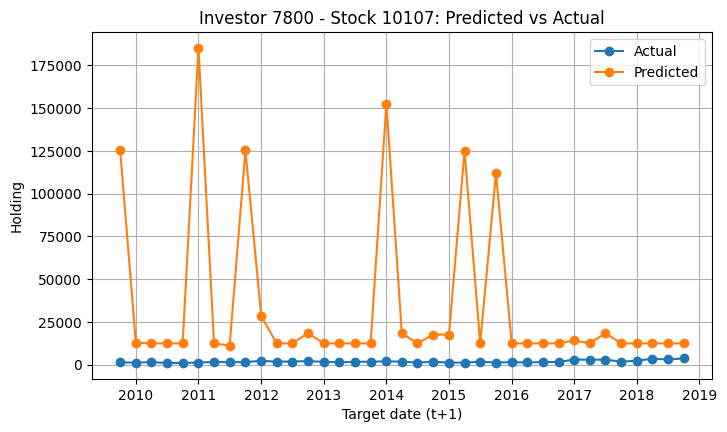


[Preview] Head of comparison table:
  target_date       y_true         y_pred            err        abs_err  \
0  2010-10-01  1412.812370  125810.026824  124397.214454  124397.214454   
1  2011-01-01  1292.896955   12875.400000   11582.503045   11582.503045   
2  2011-04-01  1565.984316   12500.000000   10934.015684   10934.015684   
3  2011-07-01  1063.475203   12500.000000   11436.524797   11436.524797   
4  2011-10-01  1080.473931   12500.000000   11419.526069   11419.526069   

     pct_err  
0  88.049353  
1   8.958566  
2   6.982200  
3  10.753918  
4  10.568997  


ValueError: not enough values to unpack (expected 4, got 2)

In [24]:
eval_df_m2, metrics_m2, preds_m2, prompts_m2 = pipeline_m2(
    df_banks=df_banks,
    mgrno=7800,
    permno=10107,
    start_date="2010-07-01",  
    end_date="2019-07-01",    
    call_fn=get_response,
    investor_role="Banks",
    plot=True
)

## Method 3: Add historical data

In [25]:
def build_prompt_m3(
    row_t, prev_row, investor_role="Banks", investor_id=7800, hist_guard=None
):
    """Build a single prompt for one (permno, fdate) row with (t-1) anchor."""
    def _fmt(x):
        try:
            return pd.to_datetime(x).strftime("%Y-%m-%d")
        except Exception:
            return str(x)

    stock_id = row_t["permno"]
    fdate_t  = _fmt(row_t["fdate"])
    fdate_tm1 = _fmt(prev_row["fdate"])
    fdate_tp1 = _fmt(pd.to_datetime(row_t["fdate"]) + pd.DateOffset(months=3))

    # current-quarter features (Series supports list selection)
    me_t, be_t, profit_t, Gat_t, beta_t = row_t[["me","be","profit","Gat","beta"]]

    # previous-quarter features + holding
    me_tm1, be_tm1, profit_tm1, Gat_tm1, beta_tm1 = prev_row[["me","be","profit","Gat","beta"]]
    holding_tm1 = prev_row["holding"]

    guard_text = ""
    if isinstance(hist_guard, tuple) and len(hist_guard) == 2:
        lo, hi = hist_guard
        guard_text = f"- Historical scale hint: typical holding in [{lo:.4g}, {hi:.4g}] (not strict)\n"

    prompt = f"""
Act as a quantitative portfolio manager at a {investor_role} institution.

Task: Predict the **next quarter (t+1)** holding (same unit as dataset `holding`) for a **specific investor** in a **specific stock**,
using both current-quarter fundamentals (t) and previous-quarter fundamentals + realized holding (t-1) as anchor.

Investor:
- investor_type: {investor_role}
- investor_id (mgrno): {investor_id}

Stock:
- stock_id (permno): {stock_id}

Timeline:
- previous_quarter (t-1): {fdate_tm1}
- current_quarter  (t):   {fdate_t}
- target_quarter   (t+1): {fdate_tp1}

Context / Anchors:
{guard_text}- Previous-quarter realized holding (t-1): {holding_tm1}

Previous-quarter fundamentals (t-1):
me={me_tm1}, be={be_tm1}, profit={profit_tm1}, Gat={Gat_tm1}, beta={beta_tm1}

Current-quarter fundamentals (t):
me={me_t}, be={be_t}, profit={profit_t}, Gat={Gat_t}, beta={beta_t}

Guidance:
- Use (t-1) realized holding as anchor and adjust toward (t) fundamentals.
- Prediction should NOT equal market equity.
- Prefer higher holdings for more profitable and lower-beta firms.
- Keep the prediction within a reasonable order-of-magnitude of (t-1).
- Output must be a single non-negative float. No explanation.

OUTPUT (valid JSON ONLY):
{{"holding_value": <value>}}
"""
    return prompt


def generate_m3_prompts(
    df_banks: pd.DataFrame,
    mgrno: int,
    permno: int,
    start_date: str = None,
    end_date: str = None,
    investor_role: str = "Banks"
):
    """
    Generate prompts for all available input pairs (t-1, t) to predict holding at t+1,
    for a specific investor (mgrno) and stock (permno).
    """
    df = df_banks.copy()

    # Ensure datetime
    if not pd.api.types.is_datetime64_any_dtype(df["fdate"]):
        s_num = pd.to_numeric(df["fdate"], errors="coerce")
        unit = "ms" if s_num.dropna().median() > 1e11 else "s"
        df["fdate"] = pd.to_datetime(s_num, unit=unit, errors="coerce")

    # Filter to investor & stock
    df = df[(df["mgrno"] == mgrno) & (df["permno"] == permno)].copy()

    # Optional date window on input t
    if start_date is not None:
        df = df[df["fdate"] >= pd.to_datetime(start_date)]
    if end_date is not None:
        df = df[df["fdate"] <= pd.to_datetime(end_date)]

    # Sort and deduplicate
    df = df.sort_values("fdate").drop_duplicates(subset=["permno","mgrno","fdate"], keep="first")

    # Check required columns
    needed_cols = ["permno","fdate","me","be","profit","Gat","beta","mgrno","holding"]
    missing = [c for c in needed_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    results = []
    df = df.reset_index(drop=True)

    # Iterate using iloc so row_t / prev_row are Series (not dict)
    for i in tqdm(range(1, len(df)), desc="Generating M3 Prompts"):
        prev_row = df.iloc[i-1]
        row_t    = df.iloc[i]

        input_date  = row_t["fdate"]
        target_date = row_t["fdate"] + pd.DateOffset(months=3)

        prompt = build_prompt_m3(
            row_t=row_t,
            prev_row=prev_row,
            investor_role=investor_role,
            investor_id=mgrno
        )

        results.append({
            "input_date": input_date,
            "target_date": target_date,
            "mgrno": mgrno,
            "permno": permno,
            "prompt": prompt
        })

    print(f"[Info] Built {len(results)} prompts (with prev anchor) for mgrno={mgrno}, permno={permno}.")
    return results

def pipeline_m3(
    df_banks,
    mgrno,
    permno,
    start_date,
    end_date,
    call_fn,
    investor_role="Banks",
    plot=True
):
    """
    Run Method-3 end-to-end: prompts (with prev anchor) -> model -> evaluation.
    Returns (eval_df, metrics, preds_raw, prompts).
    """
    print("[Stage] Generating M3 prompts...")
    prompts = generate_m3_prompts(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        start_date=start_date,
        end_date=end_date,
        investor_role=investor_role
    )

    print("[Stage] Calling model to obtain predictions...")
    preds_raw = prompts_to_preds_raw(prompts, call_fn=call_fn)

    print("[Stage] Evaluating predictions against ground truth...")
    eval_df, metrics = evaluate_predictions(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        preds_raw=preds_raw,
        plot=plot
    )
    return eval_df, metrics, preds_raw, prompts

[Stage] Generating M3 prompts...


Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1114.81it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7800, permno=10107.
[Stage] Calling model to obtain predictions...


Querying model: 100%|██████████| 37/37 [02:30<00:00,  4.06s/it]


[Info] Collected 37 model responses.
[Stage] Evaluating predictions against ground truth...
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=441.9, RMSE=605, MAPE=23.56%


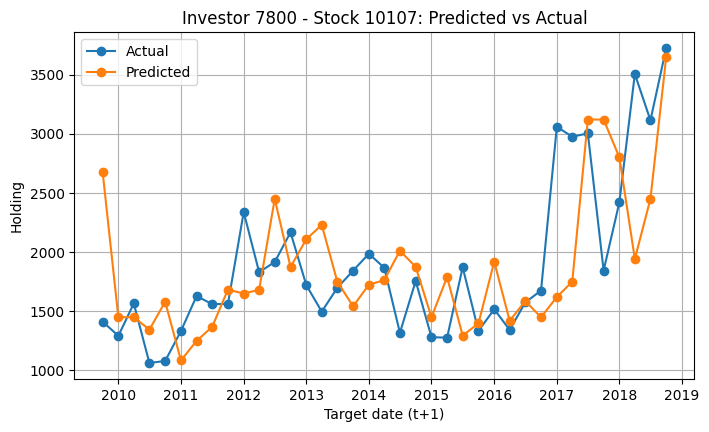


[Preview] Head of comparison table:
  target_date       y_true  y_pred          err      abs_err   pct_err
0  2010-10-01  1412.812370  2680.5  1267.687630  1267.687630  0.897280
1  2011-01-01  1292.896955  1450.0   157.103045   157.103045  0.121512
2  2011-04-01  1565.984316  1450.0  -115.984316   115.984316  0.074065
3  2011-07-01  1063.475203  1345.0   281.524797   281.524797  0.264722
4  2011-10-01  1080.473931  1580.5   500.026069   500.026069  0.462784


In [26]:
eval_df_m3, metrics_m3, preds_m3, prompts_m3 = pipeline_m3(
    df_banks=df_banks,
    mgrno=7800,
    permno=10107,
    start_date="2010-04-01",
    end_date="2019-07-01",
    call_fn=get_response,     # your API caller
    investor_role="Banks",
    plot=True
)

## Compare them on more inverstor on stock 10107

In [29]:
# ---------- 1) helper: ensure datetime ----------
def ensure_datetime_fdate(df, col="fdate"):
    """Ensure df[col] is pandas datetime."""
    if not pd.api.types.is_datetime64_any_dtype(df[col]):
        s_num = pd.to_numeric(df[col], errors="coerce")
        unit = "ms" if s_num.dropna().median() > 1e11 else "s"
        df[col] = pd.to_datetime(s_num, unit=unit, errors="coerce")
    return df

# ---------- 2) choose investors for a given stock ----------
def find_investors_for_stock_aligned(
    df_banks: pd.DataFrame,
    permno: int,
    target_start="2010-10-01",  
    target_end="2019-10-01",    
    min_nonzero_targets=4,
    top_k=10
):
    """
    For a fixed stock (permno), find mgrno that can be evaluated on the SAME target quarters
    (Q4..Q8 by default) for BOTH M2 and M3.

    Returns a DataFrame of candidate mgrno with basic counts.
    """
    df = df_banks.copy()
    df = ensure_datetime_fdate(df, "fdate")
    df = df[df["permno"] == permno].copy()

    # target quarters (e.g., Q4..Q8)
    target_qs = pd.date_range(pd.to_datetime(target_start), pd.to_datetime(target_end), freq="QS")
    # M2 needs t = target-1Q
    m2_inputs = target_qs - pd.DateOffset(months=3)
    # M3 needs (t-1,t) for each t in m2_inputs
    m3_t   = m2_inputs
    m3_tm1 = m3_t - pd.DateOffset(months=3)

    # enforce uniqueness per quarter
    df = df.sort_values(["mgrno","permno","fdate"]).drop_duplicates(subset=["mgrno","permno","fdate"], keep="first")

    cands = []
    for mgr, g in df.groupby("mgrno"):
        dates = set(g["fdate"].tolist())

        ok_m2 = all(d in dates for d in m2_inputs)
        ok_m3 = all((t in dates) and ((t - pd.DateOffset(months=3)) in dates) for t in m3_t)
        if not (ok_m2 and ok_m3):
            continue

        # non-zero target count filter
        tgt = g[g["fdate"].isin(target_qs)]
        nonzero = (tgt["holding"].fillna(0).abs() > 0).sum()
        if nonzero < min_nonzero_targets:
            continue

        cands.append({
            "mgrno": int(mgr),
            "nonzero_targets": int(nonzero),
            "n_targets": int(tgt["fdate"].nunique())
        })

    out = pd.DataFrame(cands).sort_values(["nonzero_targets","n_targets","mgrno"], ascending=[False,False,True])
    if top_k is not None and len(out) > top_k:
        out = out.head(top_k)
    #print(f"[Info] Found {len(out)} investors for permno={permno} aligned on targets {target_start}..{target_end}.")
    return out

# ---------- 3) per-investor pipeline wrappers (reuse your existing funcs) ----------
def pipeline_m2(df_banks, mgrno, permno, start_date, end_date, call_fn, investor_role="Banks", plot=False):
    prompts = generate_m2_prompts(
        df_banks=df_banks, mgrno=mgrno, permno=permno,
        start_date=start_date, end_date=end_date, investor_role=investor_role
    )
    preds_raw = prompts_to_preds_raw(prompts, call_fn=call_fn)
    eval_df, metrics = evaluate_predictions(
        df_banks=df_banks, mgrno=mgrno, permno=permno, preds_raw=preds_raw, plot=plot
    )
    return eval_df, metrics

def pipeline_m3(df_banks, mgrno, permno, start_date, end_date, call_fn, investor_role="Banks", plot=False):
    prompts = generate_m3_prompts(
        df_banks=df_banks, mgrno=mgrno, permno=permno,
        start_date=start_date, end_date=end_date, investor_role=investor_role
    )
    preds_raw = prompts_to_preds_raw(prompts, call_fn=call_fn)
    eval_df, metrics = evaluate_predictions(
        df_banks=df_banks, mgrno=mgrno, permno=permno, preds_raw=preds_raw, plot=plot
    )
    return eval_df, metrics

# ---------- 4) run comparison across many investors for one stock ----------
def compare_investors_for_stock(
    df_banks: pd.DataFrame,
    permno: int,
    mgr_list = None,
    m2_start="2010-07-01", m2_end="2019-07-01",
    m3_start="2010-04-01", m3_end="2019-07-01",
    call_fn=None,
    investor_role="Banks",
    plot=False
):
    if mgr_list is None:
        cands = find_investors_for_stock_aligned(
            df_banks, permno=permno,
            target_start="2010-10-01", target_end="2019-10-01",  # Q4..Q8
            min_nonzero_targets=4, top_k=10
        )
        mgr_list = cands["mgrno"].tolist()
        
    """
    Run M2 and M3 for many investors of one stock.
    Only tqdm progress bar will show; results stored in DataFrames.
    """
    metrics_rows = []
    pred_rows = []

    for mgr in tqdm(mgr_list, desc=f"Comparing investors for stock {permno}"):
        # Method 2
        eval_m2, met_m2 = pipeline_m2(
            df_banks, mgr, permno, m2_start, m2_end, call_fn, investor_role, plot
        )
        # Method 3
        eval_m3, met_m3 = pipeline_m3(
            df_banks, mgr, permno, m3_start, m3_end, call_fn, investor_role, plot
        )

        # store metrics
        metrics_rows.append({"mgrno": mgr, "method": "M2", **met_m2})
        metrics_rows.append({"mgrno": mgr, "method": "M3", **met_m3})

        # store predictions
        m2_tbl = eval_m2[["target_date","y_true","y_pred"]].rename(columns={"y_pred":"y_pred_m2"})
        m3_tbl = eval_m3[["target_date","y_pred"]].rename(columns={"y_pred":"y_pred_m3"})
        comb = (m2_tbl.merge(m3_tbl, on="target_date", how="outer").sort_values("target_date"))
        comb.insert(0, "mgrno", mgr)
        comb.insert(1, "permno", permno)
        pred_rows.append(comb)

    metrics_df = pd.DataFrame(metrics_rows)
    pred_df = pd.concat(pred_rows, ignore_index=True)

    return metrics_df, pred_df

In [30]:
metrics_df, pred_df = compare_investors_for_stock(
    df_banks=df_banks,
    permno=10107,
    mgr_list=None,  
    m2_start="2010-07-01", m2_end="2019-07-01",
    m3_start="2010-04-01", m3_end="2019-07-01",
    call_fn=get_response,
    investor_role="Banks",
    plot=False
)

# metrics_df error index df
display(metrics_df)

# pred_df prediction df
display(pred_df)

Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7193.35it/s]


[Info] Built 37 prompts for mgrno=1500, permno=10107.



Querying model: 100%|██████████| 37/37 [02:27<00:00,  3.99s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=2.884e+04, RMSE=4.503e+04, MAPE=1276516.80%

[Preview] Head of comparison table:
  target_date    y_true   y_pred           err       abs_err       pct_err
0  2010-10-01  1.943680  42350.0  42348.056320  42348.056320  21787.562652
1  2011-01-01  1.614956  12500.0  12498.385044  12498.385044   7739.147509
2  2011-04-01  1.493128  12500.0  12498.506872  12498.506872   8370.686816
3  2011-07-01  1.534568  12500.0  12498.465432  12498.465432   8144.614798
4  2011-10-01  2.182249  12500.0  12497.817751  12497.817751   5727.034453



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 897.41it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=1500, permno=10107.



Querying model: 100%|██████████| 37/37 [02:26<00:00,  3.96s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  10%|█         | 1/10 [04:55<44:21, 295.78s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=0.3555, RMSE=0.462, MAPE=16.91%

[Preview] Head of comparison table:
  target_date    y_true  y_pred       err   abs_err   pct_err
0  2010-10-01  1.943680   1.412 -0.531680  0.531680  0.273543
1  2011-01-01  1.614956   1.789  0.174044  0.174044  0.107770
2  2011-04-01  1.493128   2.108  0.614872  0.614872  0.411801
3  2011-07-01  1.534568   1.678  0.143432  0.143432  0.093467
4  2011-10-01  2.182249   1.512 -0.670249  0.670249  0.307137



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7375.21it/s]


[Info] Built 37 prompts for mgrno=3880, permno=10107.



Querying model: 100%|██████████| 37/37 [02:24<00:00,  3.91s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=2.774e+04, RMSE=4.672e+04, MAPE=78864.66%

[Preview] Head of comparison table:
  target_date     y_true   y_pred           err       abs_err     pct_err
0  2010-10-01  44.376900  12450.0  12405.623100  12405.623100  279.551369
1  2011-01-01  15.256114  14500.0  14484.743886  14484.743886  949.438604
2  2011-04-01  46.333768  12500.0  12453.666232  12453.666232  268.781642
3  2011-07-01  41.984650  12500.0  12458.015350  12458.015350  296.727859
4  2011-10-01  49.529290  10500.0  10450.470710  10450.470710  210.995771



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1145.26it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=3880, permno=10107.



Querying model: 100%|██████████| 37/37 [02:21<00:00,  3.82s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  20%|██        | 2/10 [09:42<38:45, 290.70s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=8.219, RMSE=12.18, MAPE=29.09%

[Preview] Head of comparison table:
  target_date     y_true  y_pred        err    abs_err   pct_err
0  2010-10-01  44.376900    36.5  -7.876900   7.876900  0.177500
1  2011-01-01  15.256114    37.5  22.243886  22.243886  1.458031
2  2011-04-01  46.333768    45.2  -1.133768   1.133768  0.024470
3  2011-07-01  41.984650    15.8 -26.184650  26.184650  0.623672
4  2011-10-01  49.529290    47.2  -2.329290   2.329290  0.047029



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7036.47it/s]


[Info] Built 37 prompts for mgrno=4730, permno=10107.



Querying model: 100%|██████████| 37/37 [02:36<00:00,  4.24s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=3.465e+04, RMSE=6.89e+04, MAPE=130750.94%

[Preview] Head of comparison table:
  target_date     y_true   y_pred           err       abs_err      pct_err
0  2010-10-01  27.633691  12581.0  12553.366309  12553.366309   454.277584
1  2011-01-01  24.796026  12500.0  12475.203974  12475.203974   503.113043
2  2011-04-01  10.291138  15482.3  15472.008862  15472.008862  1503.430317
3  2011-07-01   9.888324  14500.0  14490.111676  14490.111676  1465.375922
4  2011-10-01   9.296354  12500.0  12490.703646  12490.703646  1343.613232



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1150.83it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=4730, permno=10107.



Querying model: 100%|██████████| 37/37 [02:23<00:00,  3.88s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  30%|███       | 3/10 [14:44<34:30, 295.80s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=5.088, RMSE=6.788, MAPE=20.76%

[Preview] Head of comparison table:
  target_date     y_true  y_pred        err    abs_err   pct_err
0  2010-10-01  27.633691    17.5 -10.133691  10.133691  0.366715
1  2011-01-01  24.796026    21.5  -3.296026   3.296026  0.132926
2  2011-04-01  10.291138    28.5  18.208862  18.208862  1.769373
3  2011-07-01   9.888324    25.5  15.611676  15.611676  1.578799
4  2011-10-01   9.296354    10.5   1.203646   1.203646  0.129475



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7213.07it/s]


[Info] Built 37 prompts for mgrno=5970, permno=10107.



Querying model: 100%|██████████| 37/37 [02:22<00:00,  3.84s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=4.102e+04, RMSE=6.308e+04, MAPE=249742.81%

[Preview] Head of comparison table:
  target_date    y_true         y_pred            err        abs_err  \
0  2010-10-01  5.122853  125810.026824  125804.903972  125804.903972   
1  2011-01-01  5.567951   12500.000000   12494.432049   12494.432049   
2  2011-04-01  5.961930   12500.000000   12494.038070   12494.038070   
3  2011-07-01  6.416990   12845.720000   12839.303010   12839.303010   
4  2011-10-01  8.177244   12450.000000   12441.822756   12441.822756   

        pct_err  
0  24557.588262  
1   2243.991143  
2   2095.636492  
3   2000.829423  
4   1521.517864  



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1136.67it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=5970, permno=10107.



Querying model: 100%|██████████| 37/37 [02:23<00:00,  3.89s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  40%|████      | 4/10 [19:32<29:14, 292.42s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=4.445, RMSE=6.704, MAPE=15.64%

[Preview] Head of comparison table:
  target_date    y_true  y_pred       err   abs_err   pct_err
0  2010-10-01  5.122853   6.512  1.389147  1.389147  0.271167
1  2011-01-01  5.567951   7.200  1.632049  1.632049  0.293115
2  2011-04-01  5.961930   5.234 -0.727930  0.727930  0.122096
3  2011-07-01  6.416990   5.712 -0.704990  0.704990  0.109863
4  2011-10-01  8.177244   6.200 -1.977244  1.977244  0.241798



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7245.74it/s]


[Info] Built 37 prompts for mgrno=6042, permno=10107.



Querying model: 100%|██████████| 37/37 [02:29<00:00,  4.04s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=2.023e+04, RMSE=3.552e+04, MAPE=83599.57%

[Preview] Head of comparison table:
  target_date     y_true   y_pred           err       abs_err      pct_err
0  2010-10-01   4.348657  12581.0  12576.651343  12576.651343  2892.077053
1  2011-01-01   6.634128  12500.0  12493.365872  12493.365872  1883.196513
2  2011-04-01   4.920552  12500.0  12495.079448  12495.079448  2539.365389
3  2011-07-01   9.320857  12500.0  12490.679143  12490.679143  1340.078436
4  2011-10-01  10.668314  12579.6  12568.931686  12568.931686  1178.155445



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1155.12it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=6042, permno=10107.



Querying model: 100%|██████████| 37/37 [02:19<00:00,  3.77s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  50%|█████     | 5/10 [24:22<24:18, 291.62s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=4.67, RMSE=5.748, MAPE=16.81%

[Preview] Head of comparison table:
  target_date     y_true    y_pred       err   abs_err   pct_err
0  2010-10-01   4.348657  8.210000  3.861343  3.861343  0.887939
1  2011-01-01   6.634128  9.456000  2.821872  2.821872  0.425357
2  2011-04-01   4.920552  4.512000 -0.408552  0.408552  0.083030
3  2011-07-01   9.320857  6.812000 -2.508857  2.508857  0.269166
4  2011-10-01  10.668314  5.123456 -5.544858  5.544858  0.519750



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7107.36it/s]


[Info] Built 37 prompts for mgrno=7630, permno=10107.



Querying model: 100%|██████████| 37/37 [02:19<00:00,  3.78s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=3.506e+04, RMSE=5.783e+04, MAPE=1664724.84%

[Preview] Head of comparison table:
  target_date    y_true         y_pred            err        abs_err  \
0  2010-10-01  4.671492  125810.026824  125805.355332  125805.355332   
1  2011-01-01  5.148508   12500.000000   12494.851492   12494.851492   
2  2011-04-01  5.272202   12500.000000   12494.727798   12494.727798   
3  2011-07-01  0.842701   12500.000000   12499.157299   12499.157299   
4  2011-10-01  0.600974   12500.000000   12499.399026   12499.399026   

        pct_err  
0  26930.444087  
1   2426.887890  
2   2369.925848  
3  14832.261497  
4  20798.569399  



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1138.78it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7630, permno=10107.



Querying model: 100%|██████████| 37/37 [02:22<00:00,  3.84s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  60%|██████    | 6/10 [29:05<19:15, 288.79s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=13.38, RMSE=27.67, MAPE=222.18%

[Preview] Head of comparison table:
  target_date    y_true   y_pred       err   abs_err   pct_err
0  2010-10-01  4.671492  0.84200 -3.829492  3.829492  0.819758
1  2011-01-01  5.148508  1.45679 -3.691718  3.691718  0.717046
2  2011-04-01  5.272202  4.89200 -0.380202  0.380202  0.072114
3  2011-07-01  0.842701  5.21500  4.372299  4.372299  5.188437
4  2011-10-01  0.600974  5.50000  4.899026  4.899026  8.151811



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7275.97it/s]


[Info] Built 37 prompts for mgrno=7647, permno=10107.



Querying model: 100%|██████████| 37/37 [02:26<00:00,  3.96s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=3.085e+04, RMSE=7.691e+04, MAPE=3373377.68%

[Preview] Head of comparison table:
  target_date    y_true   y_pred           err       abs_err       pct_err
0  2010-10-01  1.774797  21500.0  21498.225203  21498.225203  12113.062237
1  2011-01-01  1.060413  12500.0  12498.939587  12498.939587  11786.856395
2  2011-04-01  0.752310  12500.0  12499.247690  12499.247690  16614.490932
3  2011-07-01  0.438462  12450.0  12449.561538  12449.561538  28393.692045
4  2011-10-01  0.482441  12500.0  12499.517559  12499.517559  25908.924202



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1144.84it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7647, permno=10107.



Querying model: 100%|██████████| 37/37 [02:22<00:00,  3.86s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  70%|███████   | 7/10 [33:56<14:28, 289.37s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=0.5524, RMSE=0.9325, MAPE=47.95%

[Preview] Head of comparison table:
  target_date    y_true    y_pred       err   abs_err   pct_err
0  2010-10-01  1.774797  1.523000 -0.251797  0.251797  0.141874
1  2011-01-01  1.060413  1.621328  0.560914  0.560914  0.528958
2  2011-04-01  0.752310  1.812000  1.059690  1.059690  1.408582
3  2011-07-01  0.438462  1.125000  0.686538  0.686538  1.565785
4  2011-10-01  0.482441  0.781000  0.298559  0.298559  0.618852



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7272.91it/s]


[Info] Built 37 prompts for mgrno=7687, permno=10107.



Querying model: 100%|██████████| 37/37 [02:23<00:00,  3.89s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=4.324e+04, RMSE=7.019e+04, MAPE=2264869.56%

[Preview] Head of comparison table:
  target_date    y_true   y_pred           err       abs_err       pct_err
0  2010-10-01  7.309462  11245.0  11237.690538  11237.690538   1537.417023
1  2011-01-01  8.110581  12500.0  12491.889419  12491.889419   1540.196540
2  2011-04-01  8.487154  12500.0  12491.512846  12491.512846   1471.814090
3  2011-07-01  0.446303  12500.0  12499.553697  12499.553697  28006.904407
4  2011-10-01  0.466294  12567.3  12566.833706  12566.833706  26950.479864



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 963.85it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7687, permno=10107.



Querying model: 100%|██████████| 37/37 [02:23<00:00,  3.87s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=2.971e+04, RMSE=5.194e+04, MAPE=1599.38%

[Preview] Head of comparison table:
  target_date       y_true   y_pred           err       abs_err    pct_err
0  2010-10-01  1412.812370  18742.5  17329.687630  17329.687630  12.266093
1  2011-01-01  1292.896955  12500.0  11207.103045  11207.103045   8.668211
2  2011-04-01  1565.984316  12450.0  10884.015684  10884.015684   6.950271
3  2011-07-01  1063.475203  12500.0  11436.524797  11436.524797  10.753918
4  2011-10-01  1080.473931  12500.0  11419.526069  11419.526069  10.568997



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1133.13it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7800, permno=10107.



Querying model: 100%|██████████| 37/37 [02:18<00:00,  3.75s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107:  90%|█████████ | 9/10 [43:20<04:45, 285.55s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=444.6, RMSE=602.9, MAPE=23.66%

[Preview] Head of comparison table:
  target_date       y_true   y_pred          err      abs_err   pct_err
0  2010-10-01  1412.812370  2670.76  1257.947630  1257.947630  0.890385
1  2011-01-01  1292.896955  1420.50   127.603045   127.603045  0.098695
2  2011-04-01  1565.984316  1450.00  -115.984316   115.984316  0.074065
3  2011-07-01  1063.475203  1327.50   264.024797   264.024797  0.248266
4  2011-10-01  1080.473931  1620.50   540.026069   540.026069  0.499805



Generating ANS: 100%|██████████| 37/37 [00:00<00:00, 7201.69it/s]


[Info] Built 37 prompts for mgrno=7875, permno=10107.



Querying model: 100%|██████████| 37/37 [02:26<00:00,  3.95s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=2.68e+04, RMSE=4.409e+04, MAPE=402590.30%

[Preview] Head of comparison table:
  target_date    y_true         y_pred            err        abs_err  \
0  2010-10-01  3.951107  125810.026824  125806.075717  125806.075717   
1  2011-01-01  3.719660   12500.000000   12496.280340   12496.280340   
2  2011-04-01  3.771326   15789.320000   15785.548674   15785.548674   
3  2011-07-01  3.720582   12500.000000   12496.279418   12496.279418   
4  2011-10-01  4.177769   12500.000000   12495.822231   12495.822231   

        pct_err  
0  31840.715643  
1   3359.521926  
2   4185.675985  
3   3358.689425  
4   2991.027840  



Generating M3 Prompts: 100%|██████████| 37/37 [00:00<00:00, 958.86it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7875, permno=10107.



Querying model: 100%|██████████| 37/37 [02:24<00:00,  3.91s/it]


[Info] Collected 37 model responses.
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...


Comparing investors for stock 10107: 100%|██████████| 10/10 [48:12<00:00, 289.21s/it]

[Info] Merging on target_date...
[Result] Samples: 37, MAE=0.8872, RMSE=1.126, MAPE=10.18%

[Preview] Head of comparison table:
  target_date    y_true    y_pred       err   abs_err   pct_err
0  2010-10-01  3.951107  3.289000 -0.662107  0.662107  0.167575
1  2011-01-01  3.719660  3.467000 -0.252660  0.252660  0.067926
2  2011-04-01  3.771326  4.123457  0.352131  0.352131  0.093371
3  2011-07-01  3.720582  3.812000  0.091418  0.091418  0.024571
4  2011-10-01  4.177769  3.812456 -0.365313  0.365313  0.087442


,mgrno,method,count,MAE,RMSE,MAPE_%
0,1500,M2,37,28837.126662,45033.718393,1.276517e+06
1,1500,M3,37,0.355465,0.462035,1.691203e+01
2,3880,M2,37,27738.879270,46719.278458,7.886466e+04
3,3880,M3,37,8.218797,12.184712,2.909259e+01
4,4730,M2,37,34650.515463,68901.426440,1.307509e+05
5,4730,M3,37,5.087608,6.787946,2.076385e+01
6,5970,M2,37,41022.395322,63081.785198,2.497428e+05
7,5970,M3,37,4.445078,6.704107,1.563820e+01
8,6042,M2,37,20225.030742,35516.818947,8.359957e+04
9,6042,M3,37,4.669932,5.748449,1.680920e+01


,mgrno,permno,target_date,y_true,y_pred_m2,y_pred_m3
0,1500,10107,2010-10-01,1.943680,42350.0,1.412000
1,1500,10107,2011-01-01,1.614956,12500.0,1.789000
2,1500,10107,2011-04-01,1.493128,12500.0,2.108000
3,1500,10107,2011-07-01,1.534568,12500.0,1.678000
4,1500,10107,2011-10-01,2.182249,12500.0,1.512000
...,...,...,...,...,...,...
365,7875,10107,2018-10-01,15.050033,12500.0,16.200000
366,7875,10107,2019-01-01,16.360991,12500.0,16.500000
367,7875,10107,2019-04-01,18.491170,12500.0,15.123457
368,7875,10107,2019-07-01,16.678595,12500.0,17.250000


[Info] Aggregated table by quarter (sum across investors):
   permno target_date       y_true      y_pred_m2    y_pred_m3
0   10107  2010-10-01  1513.945008  508879.580473  2754.439000
1   10107  2011-01-01  1364.805293  127000.000000  1512.613575
2   10107  2011-04-01  1653.267824  131221.620000  1553.893457
3   10107  2011-07-01  1138.068640  127295.720000  1401.369000
4   10107  2011-10-01  1166.054858  123096.900000  1709.728912


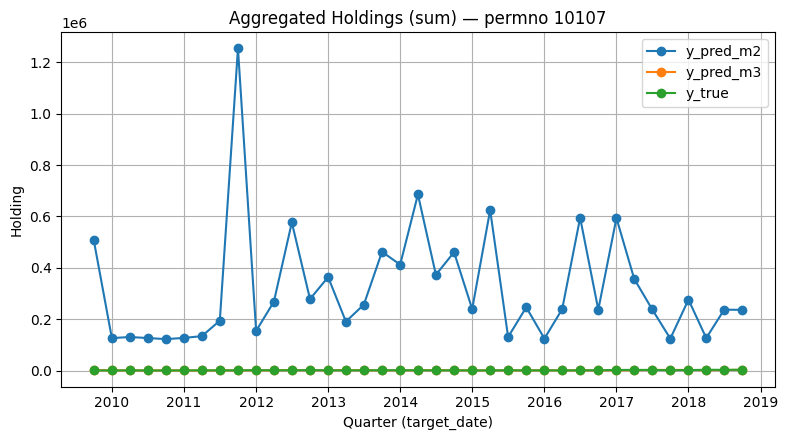

In [31]:
# 1) ensure datetime and normalize to day (avoid merge/dup issues)
pred_df = pred_df.copy()
pred_df["target_date"] = pd.to_datetime(pred_df["target_date"]).dt.floor("D")

# 2) aggregate across investors by quarter (sum). 
#    If you prefer mean, change .sum() -> .mean()
agg = (
    pred_df
    .groupby(["permno", "target_date"], as_index=False)[["y_true", "y_pred_m2", "y_pred_m3"]]
    .sum()
    .sort_values(["permno", "target_date"])
)

print("[Info] Aggregated table by quarter (sum across investors):")
print(agg.head())

# 3) optional: compute per-quarter errors vs. ground truth
agg["err_m2"]  = agg["y_pred_m2"] - agg["y_true"]
agg["err_m3"]  = agg["y_pred_m3"] - agg["y_true"]
agg["mape_m2"] = (agg["err_m2"].abs() / (agg["y_true"].abs() + 1e-9)) * 100
agg["mape_m3"] = (agg["err_m3"].abs() / (agg["y_true"].abs() + 1e-9)) * 100
agg["pct_err_m2"] = (agg["y_pred_m2"] - agg["y_true"]).abs() / (agg["y_true"].abs() + 1e-9) * 100
agg["pct_err_m3"] = (agg["y_pred_m3"] - agg["y_true"]).abs() / (agg["y_true"].abs() + 1e-9) * 100


# 4) pivot to long format for plotting (nice legend)
plot_df = agg.melt(
    id_vars=["permno", "target_date"],
    value_vars=["y_true", "y_pred_m2", "y_pred_m3"],
    var_name="series", value_name="value"
)

# 5) plot (one figure per stock). If you only have one permno, this will draw one figure.
for pm, g in plot_df.groupby("permno"):
    g = g.sort_values("target_date")
    plt.figure(figsize=(8, 4.5))
    for name, gi in g.groupby("series"):
        plt.plot(gi["target_date"], gi["value"], marker="o", label=name)
    plt.title(f"Aggregated Holdings (sum) — permno {pm}")
    plt.xlabel("Quarter (target_date)")
    plt.ylabel("Holding")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6) if you want a clean comparison table to save/export:
#    keep only the essentials (drop error columns if not needed)


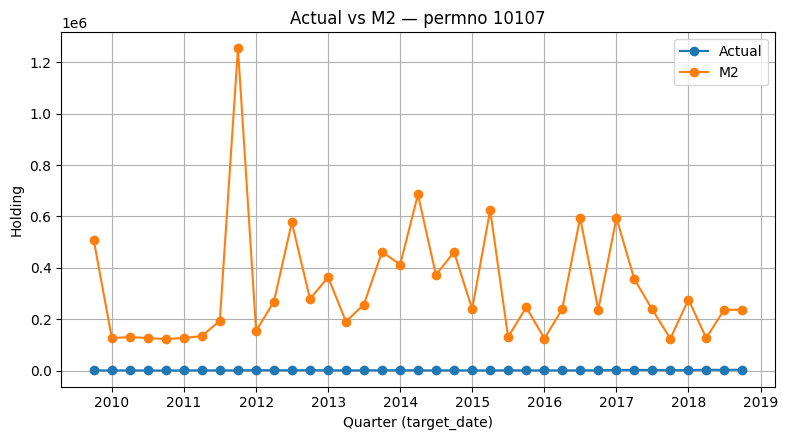

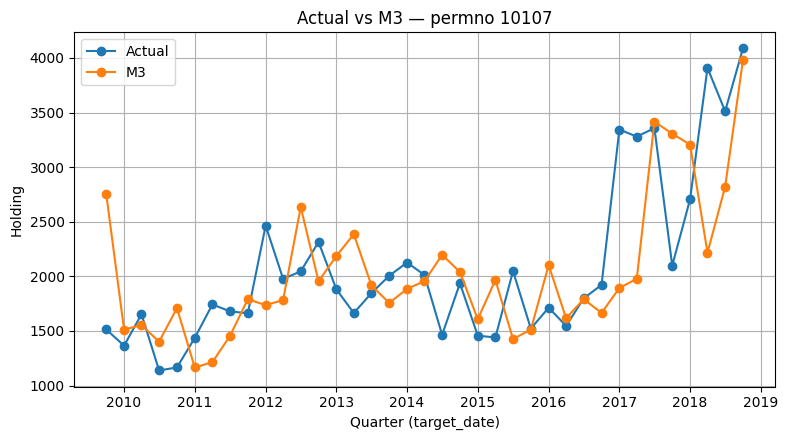

In [32]:
for pm, g in agg.groupby("permno"):
    g = g.sort_values("target_date")
    plt.figure(figsize=(8,4.5))
    plt.plot(g["target_date"], g["y_true"], marker="o", label="Actual")
    plt.plot(g["target_date"], g["y_pred_m2"], marker="o", label="M2")
    plt.title(f"Actual vs M2 — permno {pm}")
    plt.xlabel("Quarter (target_date)")
    plt.ylabel("Holding")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---- 3) plot: Actual vs M3 ----
for pm, g in agg.groupby("permno"):
    g = g.sort_values("target_date")
    plt.figure(figsize=(8,4.5))
    plt.plot(g["target_date"], g["y_true"], marker="o", label="Actual")
    plt.plot(g["target_date"], g["y_pred_m3"], marker="o", label="M3")
    plt.title(f"Actual vs M3 — permno {pm}")
    plt.xlabel("Quarter (target_date)")
    plt.ylabel("Holding")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [34]:
final_table = agg[["permno", "target_date", "y_true", "y_pred_m2", "y_pred_m3", "mape_m2", "mape_m3","pct_err_m2","pct_err_m3"]]

final_table.to_csv("agg_holding_comparison.csv", index=False)

In [35]:
final_table

,permno,target_date,y_true,y_pred_m2,y_pred_m3,mape_m2,mape_m3,pct_err_m2,pct_err_m3
0,10107,2010-10-01,1513.945008,5.088796e+05,2754.439000,33512.818022,81.937850,33512.818022,81.937850
1,10107,2011-01-01,1364.805293,1.270000e+05,1512.613575,9205.356643,10.829990,9205.356643,10.829990
2,10107,2011-04-01,1653.267824,1.312216e+05,1553.893457,7837.106021,6.010785,7837.106021,6.010785
3,10107,2011-07-01,1138.068640,1.272957e+05,1401.369000,11085.240993,23.135719,11085.240993,23.135719
4,10107,2011-10-01,1166.054858,1.230969e+05,1709.728912,10456.698867,46.625084,10456.698867,46.625084
5,10107,2012-01-01,1436.147343,1.276975e+05,1165.379457,8791.671225,18.853768,8791.671225,18.853768
6,10107,2012-04-01,1742.729103,1.347000e+05,1214.241000,7629.256360,30.325316,7629.256360,30.325316
7,10107,2012-07-01,1679.307322,1.946219e+05,1454.589000,11489.412340,13.381608,11489.412340,13.381608
8,10107,2012-10-01,1662.058095,1.253194e+06,1790.859000,75300.108647,7.749483,75300.108647,7.749483
9,10107,2013-01-01,2464.337702,1.551285e+05,1736.316457,6194.934736,29.542268,6194.934736,29.542268


## Check about the lag

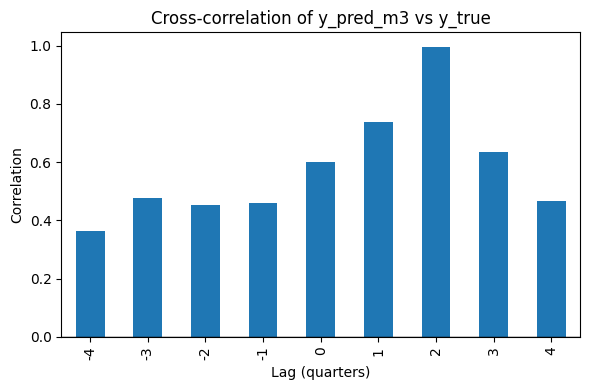

-4    0.363517
-3    0.476736
-2    0.454442
-1    0.460602
 0    0.600252
 1    0.738661
 2    0.995661
 3    0.635675
 4    0.466262
dtype: float64


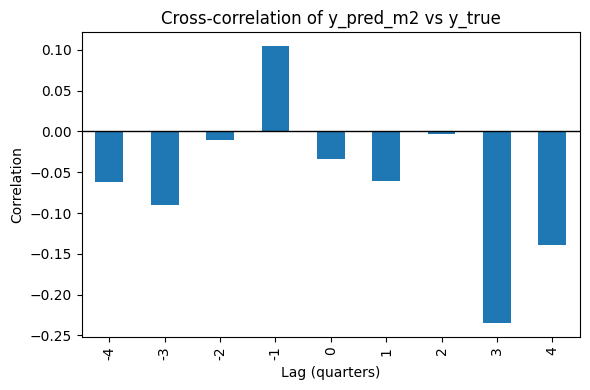

-4   -0.062428
-3   -0.090334
-2   -0.010945
-1    0.104397
 0   -0.033743
 1   -0.061068
 2   -0.003044
 3   -0.234893
 4   -0.139321
dtype: float64


In [36]:
def check_lag_correlation(df, y_true_col="y_true", y_pred_col="y_pred_m3", max_lag=4):
    """
    Compute cross-correlation between actual and predicted series to detect lag.
    
    Args:
        df: DataFrame with chronological order
        y_true_col: column name for actual values
        y_pred_col: column name for predicted values (M2 or M3)
        max_lag: how many quarters forward/backward to test
    
    Returns:
        corr_series: pandas Series indexed by lag (negative = pred leads, positive = pred lags)
    """
    y_true = df[y_true_col].values
    y_pred = df[y_pred_col].values
    
    corrs = {}
    for lag in range(-max_lag, max_lag+1):
        if lag < 0:   # prediction ahead of true
            corr = np.corrcoef(y_pred[:lag], y_true[-lag:])[0,1]
        elif lag > 0: # prediction behind true
            corr = np.corrcoef(y_pred[lag:], y_true[:-lag])[0,1]
        else:
            corr = np.corrcoef(y_pred, y_true)[0,1]
        corrs[lag] = corr
    
    corr_series = pd.Series(corrs)
    
    # plot
    plt.figure(figsize=(6,4))
    corr_series.plot(kind="bar")
    plt.axhline(0, color="black", lw=1)
    plt.title(f"Cross-correlation of {y_pred_col} vs {y_true_col}")
    plt.xlabel("Lag (quarters)")
    plt.ylabel("Correlation")
    plt.tight_layout()
    plt.show()
    
    return corr_series

# Example: check lag for M3
corr_m3 = check_lag_correlation(final_table, y_true_col="y_true", y_pred_col="y_pred_m3", max_lag=4)
print(corr_m3)

# Example: check lag for M2
corr_m2 = check_lag_correlation(final_table, y_true_col="y_true", y_pred_col="y_pred_m2", max_lag=4)
print(corr_m2)

## Method 4: Try to solve the lag problem

In [37]:
def build_prompt_m4(
    row_t, prev_row, investor_role="Banks", investor_id=7800, hist_guard=None
):
    """Build a single prompt for one (permno, fdate) row with (t-1) anchor."""
    def _fmt(x):
        try:
            return pd.to_datetime(x).strftime("%Y-%m-%d")
        except Exception:
            return str(x)

    stock_id = row_t["permno"]
    fdate_t  = _fmt(row_t["fdate"])
    fdate_tm1 = _fmt(prev_row["fdate"])
    fdate_tp1 = _fmt(pd.to_datetime(row_t["fdate"]) + pd.DateOffset(months=3))

    # current-quarter features (Series supports list selection)
    me_t, be_t, profit_t, Gat_t, beta_t = row_t[["me","be","profit","Gat","beta"]]

    # previous-quarter features + holding
    me_tm1, be_tm1, profit_tm1, Gat_tm1, beta_tm1 = prev_row[["me","be","profit","Gat","beta"]]
    holding_tm1 = prev_row["holding"]

    guard_text = ""
    if isinstance(hist_guard, tuple) and len(hist_guard) == 2:
        lo, hi = hist_guard
        guard_text = f"- Historical scale hint: typical holding in [{lo:.4g}, {hi:.4g}] (not strict)\n"

    prompt = f"""
Act as a quantitative portfolio manager at a {investor_role} institution.

Task: Predict the **next quarter (t+1)** holding (same unit as dataset `holding`) for a **specific investor** in a **specific stock**,
using both current-quarter fundamentals (t) and previous-quarter fundamentals + realized holding (t-1) as anchor.

Investor:
- investor_type: {investor_role}
- investor_id (mgrno): {investor_id}

Stock:
- stock_id (permno): {stock_id}

Timeline:
- previous_quarter (t-1): {fdate_tm1}
- current_quarter  (t):   {fdate_t}
- target_quarter   (t+1): {fdate_tp1}

Context / Anchors:
{guard_text}- Previous-quarter realized holding (t-1): {holding_tm1}

Previous-quarter fundamentals (t-1):
me={me_tm1}, be={be_tm1}, profit={profit_tm1}, Gat={Gat_tm1}, beta={beta_tm1}

Current-quarter fundamentals (t):
me={me_t}, be={be_t}, profit={profit_t}, Gat={Gat_t}, beta={beta_t}

Guidance:
- Base your prediction on the most recent fundamentals (t), while using (t-1) realized holding only as a reference point.
- The target is the investor’s holding in the **next quarter (t+1)**, not the current or past quarter.
- Do NOT simply copy or lag the (t-1) holding; adjust it forward in response to the (t) fundamentals.
- Prediction should NOT equal market equity.
- Prefer higher holdings for more profitable and lower-beta firms.
- Keep the prediction within a reasonable order-of-magnitude of the investor’s historical holdings.
- Output must be a single non-negative float. No explanation.

OUTPUT (valid JSON ONLY):
{{"holding_value": <value>}}
"""
    return prompt


def generate_m4_prompts(
    df_banks: pd.DataFrame,
    mgrno: int,
    permno: int,
    start_date: str = None,
    end_date: str = None,
    investor_role: str = "Banks"
):
    """
    Generate prompts for all available input pairs (t-1, t) to predict holding at t+1,
    for a specific investor (mgrno) and stock (permno).
    """
    df = df_banks.copy()

    # Ensure datetime
    if not pd.api.types.is_datetime64_any_dtype(df["fdate"]):
        s_num = pd.to_numeric(df["fdate"], errors="coerce")
        unit = "ms" if s_num.dropna().median() > 1e11 else "s"
        df["fdate"] = pd.to_datetime(s_num, unit=unit, errors="coerce")

    # Filter to investor & stock
    df = df[(df["mgrno"] == mgrno) & (df["permno"] == permno)].copy()

    # Optional date window on input t
    if start_date is not None:
        df = df[df["fdate"] >= pd.to_datetime(start_date)]
    if end_date is not None:
        df = df[df["fdate"] <= pd.to_datetime(end_date)]

    # Sort and deduplicate
    df = df.sort_values("fdate").drop_duplicates(subset=["permno","mgrno","fdate"], keep="first")

    # Check required columns
    needed_cols = ["permno","fdate","me","be","profit","Gat","beta","mgrno","holding"]
    missing = [c for c in needed_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    results = []
    df = df.reset_index(drop=True)

    # Iterate using iloc so row_t / prev_row are Series (not dict)
    for i in tqdm(range(1, len(df)), desc="Generating M4 Prompts"):
        prev_row = df.iloc[i-1]
        row_t    = df.iloc[i]

        input_date  = row_t["fdate"]
        target_date = row_t["fdate"] + pd.DateOffset(months=3)

        prompt = build_prompt_m4(
            row_t=row_t,
            prev_row=prev_row,
            investor_role=investor_role,
            investor_id=mgrno
        )

        results.append({
            "input_date": input_date,
            "target_date": target_date,
            "mgrno": mgrno,
            "permno": permno,
            "prompt": prompt
        })

    print(f"[Info] Built {len(results)} prompts (with prev anchor) for mgrno={mgrno}, permno={permno}.")
    return results

def pipeline_m4(
    df_banks,
    mgrno,
    permno,
    start_date,
    end_date,
    call_fn,
    investor_role="Banks",
    plot=True
):
    """
    Run Method-3 end-to-end: prompts (with prev anchor) -> model -> evaluation.
    Returns (eval_df, metrics, preds_raw, prompts).
    """
    print("[Stage] Generating M4 prompts...")
    prompts = generate_m4_prompts(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        start_date=start_date,
        end_date=end_date,
        investor_role=investor_role
    )

    print("[Stage] Calling model to obtain predictions...")
    preds_raw = prompts_to_preds_raw(prompts, call_fn=call_fn)

    print("[Stage] Evaluating predictions against ground truth...")
    eval_df, metrics = evaluate_predictions(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        preds_raw=preds_raw,
        plot=plot
    )
    return eval_df, metrics, preds_raw, prompts

[Stage] Generating M4 prompts...


Generating M4 Prompts: 100%|██████████| 37/37 [00:00<00:00, 1084.92it/s]


[Info] Built 37 prompts (with prev anchor) for mgrno=7800, permno=10107.
[Stage] Calling model to obtain predictions...


Querying model: 100%|██████████| 37/37 [02:44<00:00,  4.44s/it]


[Info] Collected 37 model responses.
[Stage] Evaluating predictions against ground truth...
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 37, MAE=439.6, RMSE=603.9, MAPE=23.59%


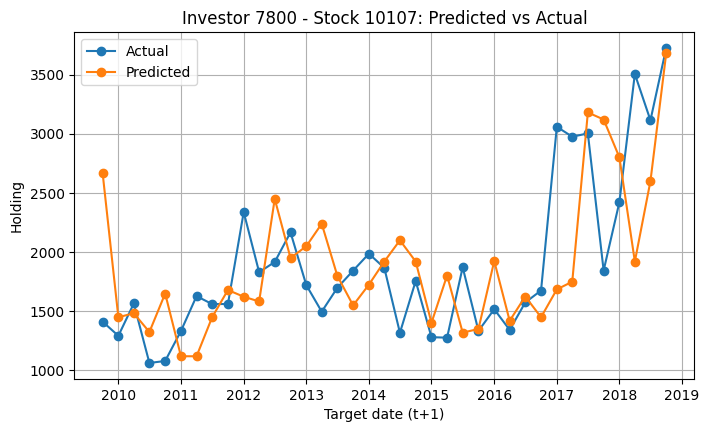


[Preview] Head of comparison table:
  target_date       y_true    y_pred          err      abs_err   pct_err
0  2010-10-01  1412.812370  2670.760  1257.947630  1257.947630  0.890385
1  2011-01-01  1292.896955  1450.000   157.103045   157.103045  0.121512
2  2011-04-01  1565.984316  1483.453   -82.531316    82.531316  0.052703
3  2011-07-01  1063.475203  1325.000   261.524797   261.524797  0.245915
4  2011-10-01  1080.473931  1650.000   569.526069   569.526069  0.527108


In [38]:
eval_df_m4, metrics_m4, preds_m4, prompts_m4 = pipeline_m4(
    df_banks=df_banks,
    mgrno=7800,
    permno=10107,
    start_date="2010-04-01",
    end_date="2019-07-01",
    call_fn=get_response,     # your API caller
    investor_role="Banks",
    plot=True
)

## Method 5: More historycal data

In [40]:
def build_prompt_m5_with_2lags(
    row_t,      # current quarter (t), features only
    row_tm1,    # previous quarter (t-1), features + realized holding
    row_tm2,    # two-quarters ago (t-2), features + realized holding
    investor_role="Banks",
    investor_id=7800,
    use_acceleration=True,   # include second-difference signals
    hist_guard=None          # optional (p5, p95)
):
    """Build a prompt using two historical lags (t-2, t-1) + current t factors to predict t+1."""

    def _fmt(x):
        try:
            return pd.to_datetime(x).strftime("%Y-%m-%d")
        except Exception:
            return str(x)

    # dates
    f_tm2 = _fmt(row_tm2["fdate"])
    f_tm1 = _fmt(row_tm1["fdate"])
    f_t   = _fmt(row_t["fdate"])
    f_tp1 = _fmt(pd.to_datetime(row_t["fdate"]) + pd.DateOffset(months=3))

    stock_id = row_t["permno"]

    # features
    def pick(r): return r[["me","be","profit","Gat","beta"]]
    me_t, be_t, pr_t, ga_t, bt_t      = pick(row_t)
    me_tm1, be_tm1, pr_tm1, ga_tm1, bt_tm1 = pick(row_tm1)
    me_tm2, be_tm2, pr_tm2, ga_tm2, bt_tm2 = pick(row_tm2)

    # realized holdings (anchors)
    hold_tm2 = row_tm2["holding"]
    hold_tm1 = row_tm1["holding"]

    # deltas (first difference)
    d_me_1  = me_t   - me_tm1
    d_be_1  = be_t   - be_tm1
    d_pr_1  = pr_t   - pr_tm1
    d_ga_1  = ga_t   - ga_tm1
    d_bt_1  = bt_t   - bt_tm1

    d_me_2  = me_tm1 - me_tm2
    d_be_2  = be_tm1 - be_tm2
    d_pr_2  = pr_tm1 - pr_tm2
    d_ga_2  = ga_tm1 - ga_tm2
    d_bt_2  = bt_tm1 - bt_tm2

    # holding momentum
    d_hold_1 = hold_tm1 - hold_tm2

    # optional acceleration (second difference)
    acc_text = ""
    if use_acceleration:
        a_me = d_me_1 - d_me_2
        a_be = d_be_1 - d_be_2
        a_pr = d_pr_1 - d_pr_2
        a_ga = d_ga_1 - d_ga_2
        a_bt = d_bt_1 - d_bt_2
        acc_text = (
            f"- Factor acceleration (Δ² over two intervals): "
            f"me={a_me:.6g}, be={a_be:.6g}, profit={a_pr:.6g}, Gat={a_ga:.6g}, beta={a_bt:.6g}\n"
        )

    guard_text = ""
    if isinstance(hist_guard, tuple) and len(hist_guard) == 2:
        lo, hi = hist_guard
        guard_text = f"- Historical scale hint: typical holding in [{lo:.4g}, {hi:.4g}] (not strict)\n"

    prompt = f"""
Act as a quantitative portfolio manager at a {investor_role} institution.

Objective: Forecast the investor-specific **next-quarter (t+1)** holding (same unit as dataset `holding`)
for the given stock, using **two-period history** to capture level, slope, and momentum — and the current-quarter fundamentals.

Investor:
- investor_type: {investor_role}
- investor_id (mgrno): {investor_id}

Stock:
- stock_id (permno): {stock_id}

Timeline:
- t-2: {f_tm2}
- t-1: {f_tm1}
-  t : {f_t}
- t+1 (target): {f_tp1}

Anchors (realized):
- holding(t-2) = {hold_tm2}
- holding(t-1) = {hold_tm1}
- holding momentum Δholding(t-1) = holding(t-1) - holding(t-2) = {d_hold_1}

Factors (levels):
- t-2: me={me_tm2}, be={be_tm2}, profit={pr_tm2}, Gat={ga_tm2}, beta={bt_tm2}
- t-1: me={me_tm1}, be={be_tm1}, profit={pr_tm1}, Gat={ga_tm1}, beta={bt_tm1}
-  t : me={me_t},  be={be_t},  profit={pr_t},  Gat={ga_t},  beta={bt_t}

Factor changes (first differences):
- t-1→t:   me={d_me_1}, be={d_be_1}, profit={d_pr_1}, Gat={d_ga_1}, beta={d_bt_1}
- t-2→t-1: me={d_me_2}, be={d_be_2}, profit={d_pr_2}, Gat={d_ga_2}, beta={d_bt_2}
{acc_text}{guard_text}
Guidance:
- Your target is strictly **t+1** (next quarter). Do not replicate t or lagged holdings.
- Use (t-1) & (t-2) holdings as anchors for level and momentum, then project one step **ahead** given (t) factor changes.
- Prediction should NOT equal market equity and must be consistent with a bank investor profile.
- Prefer higher holdings for more profitable and lower-beta firms, and react in the **next** quarter to sustained favorable changes.
- Keep within a reasonable order-of-magnitude of historical holdings; avoid extreme jumps without strong signal justification.
- Output only one non-negative float. No explanation.

OUTPUT (valid JSON ONLY):
{{"holding_value": <value>}}
"""
    return prompt


def generate_m5_prompts(
    df_banks: pd.DataFrame,
    mgrno: int,
    permno: int,
    start_date: str = None,  # window on t
    end_date: str = None,
    investor_role: str = "Banks",
    use_acceleration: bool = True
):
    """
    Generate prompts for all sequential triples (t-2, t-1, t) to predict holding at t+1.
    t is constrained by [start_date, end_date].
    """
    df = df_banks.copy()

    # Ensure datetime
    if not pd.api.types.is_datetime64_any_dtype(df["fdate"]):
        s_num = pd.to_numeric(df["fdate"], errors="coerce")
        unit = "ms" if s_num.dropna().median() > 1e11 else "s"
        df["fdate"] = pd.to_datetime(s_num, unit=unit, errors="coerce")

    # Filter to investor & stock
    df = df[(df["mgrno"] == mgrno) & (df["permno"] == permno)].copy()

    # Optional date window on input t
    if start_date is not None:
        df = df[df["fdate"] >= pd.to_datetime(start_date)]
    if end_date is not None:
        df = df[df["fdate"] <= pd.to_datetime(end_date)]

    # Sort & dedup
    df = df.sort_values("fdate").drop_duplicates(subset=["permno","mgrno","fdate"], keep="first")
    df = df.reset_index(drop=True)

    # Required columns
    need = ["permno","fdate","me","be","profit","Gat","beta","mgrno","holding"]
    miss = [c for c in need if c not in df.columns]
    if miss:
        raise ValueError(f"Missing required columns: {miss}")

    results = []
    # We need triples: (i-2, i-1, i) -> predict i+1
    for i in tqdm(range(2, len(df)), desc="Generating M5 Prompts"):
        row_tm2 = df.iloc[i-2]
        row_tm1 = df.iloc[i-1]
        row_t   = df.iloc[i]

        input_date  = row_t["fdate"]
        target_date = row_t["fdate"] + pd.DateOffset(months=3)

        # Optional per-pair historical scale guard
        # Here we use all available past holdings up to t-1 for this investor-stock.
        hist = df.loc[:i-1, "holding"]
        p5, p95 = hist.quantile([0.05, 0.95]).tolist()

        prompt = build_prompt_m5_with_2lags(
            row_t=row_t,
            row_tm1=row_tm1,
            row_tm2=row_tm2,
            investor_role=investor_role,
            investor_id=mgrno,
            use_acceleration=use_acceleration,
            hist_guard=(p5, p95)
        )

        results.append({
            "input_date": input_date,
            "target_date": target_date,
            "mgrno": mgrno,
            "permno": permno,
            "prompt": prompt
        })

    print(f"[Info] Built {len(results)} M5 prompts for mgrno={mgrno}, permno={permno}.")
    return results

def pipeline_m5(
    df_banks,
    mgrno,
    permno,
    start_date,
    end_date,
    call_fn,
    investor_role="Banks",
    plot=True
):
    """
    Run Method-3 end-to-end: prompts (with prev anchor) -> model -> evaluation.
    Returns (eval_df, metrics, preds_raw, prompts).
    """
    print("[Stage] Generating M5 prompts...")
    prompts = generate_m5_prompts(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        start_date=start_date,
        end_date=end_date,
        investor_role=investor_role
    )

    print("[Stage] Calling model to obtain predictions...")
    preds_raw = prompts_to_preds_raw(prompts, call_fn=call_fn)

    print("[Stage] Evaluating predictions against ground truth...")
    eval_df, metrics = evaluate_predictions(
        df_banks=df_banks,
        mgrno=mgrno,
        permno=permno,
        preds_raw=preds_raw,
        plot=plot
    )
    return eval_df, metrics, preds_raw, prompts

[Stage] Generating M5 prompts...


Generating M5 Prompts: 100%|██████████| 35/35 [00:00<00:00, 485.35it/s]


[Info] Built 35 M5 prompts for mgrno=7800, permno=10107.
[Stage] Calling model to obtain predictions...


Querying model: 100%|██████████| 35/35 [02:39<00:00,  4.55s/it]


[Info] Collected 35 model responses.
[Stage] Evaluating predictions against ground truth...
[Info] Building prediction DataFrame...
[Info] Extracting ground truth...
[Info] Merging on target_date...
[Result] Samples: 35, MAE=454.8, RMSE=583.6, MAPE=23.52%


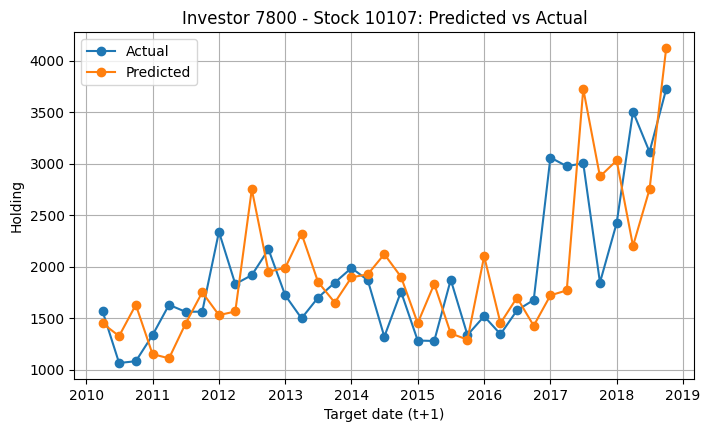


[Preview] Head of comparison table:
  target_date       y_true  y_pred         err     abs_err   pct_err
0  2011-04-01  1565.984316  1448.0 -117.984316  117.984316  0.075342
1  2011-07-01  1063.475203  1325.0  261.524797  261.524797  0.245915
2  2011-10-01  1080.473931  1628.5  548.026069  548.026069  0.507209
3  2012-01-01  1333.434646  1150.0 -183.434646  183.434646  0.137566
4  2012-04-01  1628.448441  1108.5 -519.948441  519.948441  0.319291


In [41]:
eval_df_m5, metrics_m5, preds_m5, prompts_m5 = pipeline_m5(
    df_banks=df_banks,
    mgrno=7800,
    permno=10107,
    start_date="2010-07-01",
    end_date="2019-07-01",
    call_fn=get_response,     # your API caller
    investor_role="Banks",
    plot=True
)

In [2]:
print("This is a test for newest push from autodl to github")

This is a test for newest push from autodl to github
